# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Project Description: Insurance Company Data Analysis and Model Evaluation

This project focuses on assisting the "Sure Tomorrow" insurance company in leveraging machine learning to improve its business operations. The company aims to address several key tasks, including customer segmentation for targeted marketing, predictive modeling for insurance benefit claims, and data protection through obfuscation. We will analyze a dataset containing customer information, such as gender, age, income, and family members, to build and evaluate machine learning models. The target variable is the number of insurance benefits received by each customer over the past five years.

**Analysis Goals:**

1.  **Customer Similarity:** Develop a method to identify customers similar to a given customer, enabling targeted marketing campaigns.
2.  **Benefit Prediction:** Build a predictive model to determine whether a new customer is likely to receive insurance benefits and compare its performance to a baseline (dummy) model.
3.  **Benefit Count Prediction:** Train a linear regression model to predict the number of insurance benefits a customer is likely to receive.
4.  **Data Obfuscation:** Implement a data transformation algorithm to protect sensitive customer information while preserving the predictive power of the linear regression model. We will analyze the impact of this transformation on model performance.

**Key Objectives:**

* Load and preprocess the insurance dataset.
* Implement a K-Nearest Neighbors (KNN) algorithm to find similar customers.
* Train and evaluate a linear regression model for benefit prediction.
* Compare the performance of the trained model with a dummy regressor.
* Develop and apply a data masking technique to protect customer data.
* Assess the impact of data masking on model performance.
* Draw conclusions and provide recommendations based on the analysis.

# Data Preprocessing & Exploration

## Initialization

In [85]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

from sklearn.neighbors import NearestNeighbors
from sklearn.dummy import DummyRegressor

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [86]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [87]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [88]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
2673       0  36.0  33900.0               1                   0
3351       1  30.0  41300.0               1                   0
1846       1  19.0  46500.0               2                   0
2527       1  20.0  37600.0               1                   0
861        0  39.0  29600.0               1                   0
2910       1  35.0  55700.0               1                   0
2152       1  20.0  39200.0               1                   0
2641       0  32.0  28300.0               1                   0
2356       0  39.0  27000.0               1                   0
4026       1  29.0  36100.0               1                   0

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [90]:
# we may want to fix the age type (from float to int) though this is not critical
# write your conversion here if you choose: Age is typically represented as a whole number
df['age'] = df['age'].astype(int)

In [91]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [92]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000

# Observations from df.info() and df.describe()

**df.info():**

* The DataFrame contains 5000 entries and 5 columns.
* There are no missing values in any of the columns.
* The 'age' column has been successfully converted to an integer data type.
* The data types are appropriate for each column (int64 and float64).

**df.describe():**

* The descriptive statistics indicate that the numerical features ('age', 'income', 'family_members', and 'insurance_benefits') have reasonable ranges and distributions.
* The 'gender' column appears to be a binary categorical variable, likely encoded as 0 and 1, with a balanced distribution.
* There are no apparent outliers or unusual values that require immediate attention.
* The data appears to be clean and consistent, suitable for further analysis and model building.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

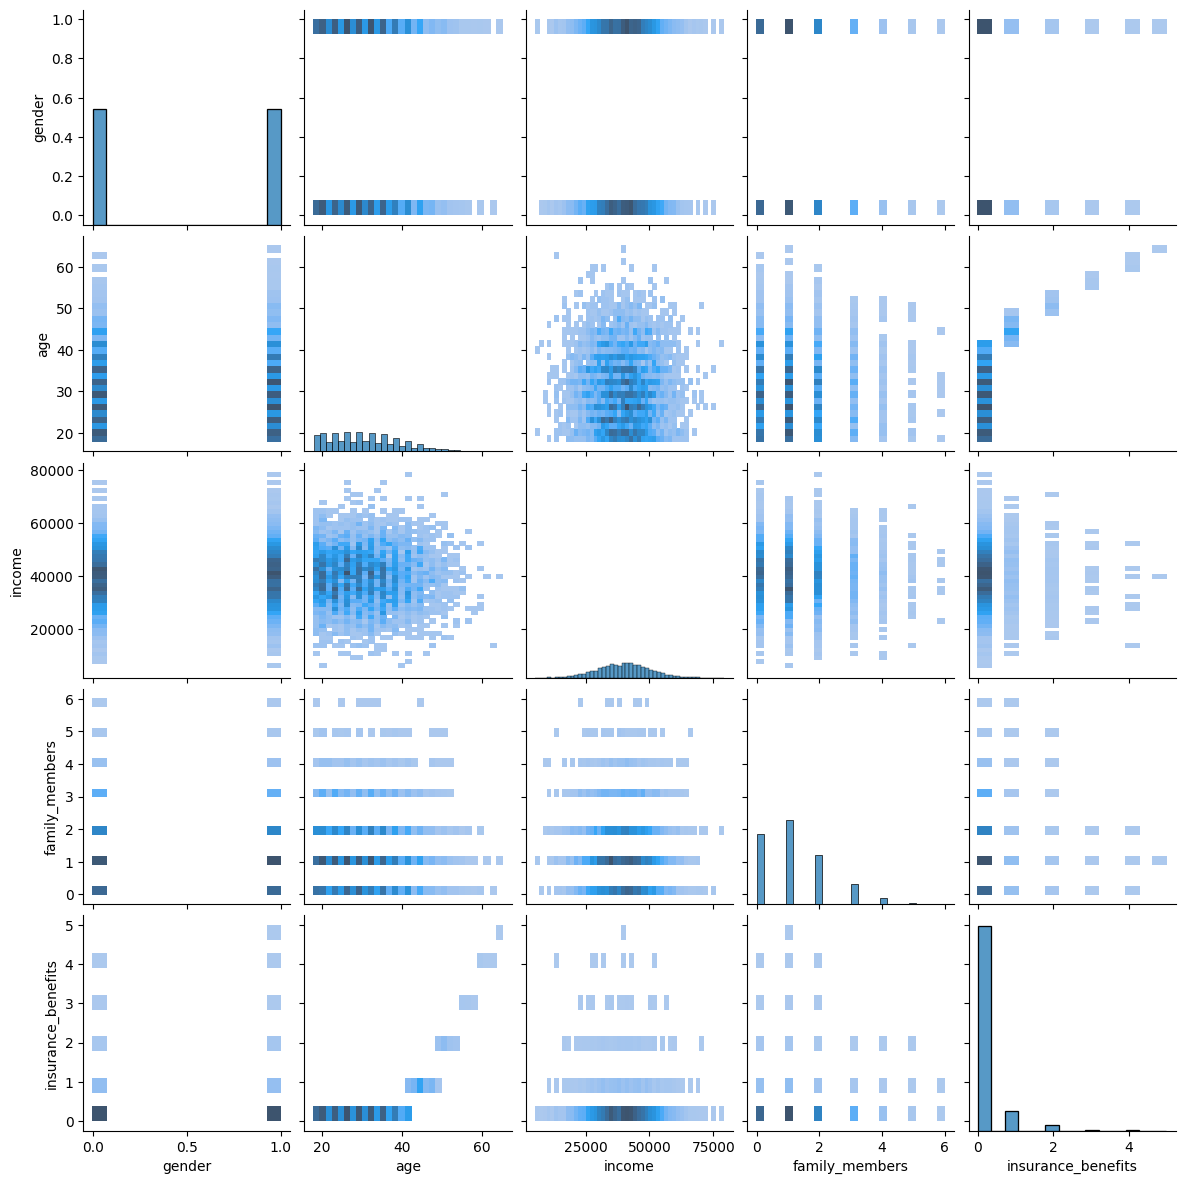

In [93]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan



In [94]:
# Feature Names

feature_names = ['gender', 'age', 'income', 'family_members']

In [95]:
# Function: Get K-Nearest Neighbors

def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [96]:
# Scale Features using MaxAbsScaler

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [97]:
df_scaled.sample(5)

gender       age    income  family_members  insurance_benefits
2857     0.0  0.400000  0.236709        0.000000                   0
549      0.0  0.523077  0.525316        0.333333                   0
975      0.0  0.430769  0.445570        0.166667                   0
434      1.0  0.492308  0.608861        0.333333                   0
318      0.0  0.630769  0.486076        0.166667                   0

Now, let's get similar records for a given one for every combination

In [98]:
n = 0  # Index of the customer for which we want to find similar customers
k = 5  # Number of nearest neighbors to find

# Euclidean, Not Scaled
print("Euclidean, Not Scaled:")
print(get_knn(df, n, k, 'euclidean'))

Euclidean, Not Scaled:
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625


In [99]:
# Euclidean, Scaled
print("Euclidean, Scaled:")
print(get_knn(df_scaled, n, k, 'euclidean'))

Euclidean, Scaled:
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                   1  0.028550


In [100]:
# Manhattan, Not Scaled
print("Manhattan, Not Scaled:")
print(get_knn(df, n, k, 'manhattan'))

Manhattan, Not Scaled:
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
2022       1   41  49600.0               0                   0       1.0
1225       0   42  49600.0               0                   1       3.0
4031       1   44  49600.0               2                   1       4.0
3424       0   38  49600.0               0                   0       5.0


In [101]:
# Manhattan, Scaled
print("Manhattan, Scaled:")
print(get_knn(df_scaled, n, k, 'manhattan'))

Manhattan, Scaled:
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245
4869     1.0  0.646154  0.637975        0.166667                   1  0.025511
3365     1.0  0.630769  0.596203        0.166667                   0  0.031646


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes, not scaling the data significantly affects the k-NN algorithm.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The results using the Manhattan distance metric show a similar trend to the Euclidean distance metric regarding the impact of scaling.
When the data is not scaled, the Manhattan distance metric also results in neighbors being primarily selected based on income.   
When the data is scaled, the Manhattan distance metric produces neighbors based on a more balanced consideration of all features, similar to the Euclidean distance metric.

# Observations from k-NN Results

**Euclidean, Not Scaled:**

* The nearest neighbors are primarily determined by the `income` feature.
* The `distance` values are relatively large, indicating that differences in `age` and `family_members` have less impact compared to `income`.
* The results show that without scaling, the feature with the largest numerical range dominates the distance calculations.

**Euclidean, Scaled:**

* The `distance` values are much smaller, showing that scaling allows all features to contribute more equally.
* The nearest neighbors are selected based on a more balanced consideration of all features, not just `income`.
* Scaling provides more meaningful and accurate results, as it prevents features with larger ranges from overshadowing others.

**Manhattan, Not Scaled:**

* Similar to the Euclidean, Not Scaled case, `income` dominates the distance calculations.
* The `distance` values are different from the Euclidean distances but still show that unscaled data prioritizes the larger numerical range.
* The trends are the same as with euclidean, showing that not scaling affects all distance metrics in the same way.

**Manhattan, Scaled:**

* Similar to the Euclidean, Scaled case, the `distance` values are much smaller, and the neighbor selection is more balanced.
* The results are different from the Euclidean, Scaled case in terms of specific neighbors and distances, due to the different nature of the distance calculation.
* Scaling again provides more balanced results.

**Overall:**

* Scaling the data is crucial for the k-NN algorithm to function effectively, as it prevents features with larger numerical ranges from dominating the distance calculations.
* Both Euclidean and Manhattan distance metrics are affected by scaling in a similar manner, although they produce different specific results.
* Scaling provides a more accurate representation of the relationships between data points, leading to more meaningful nearest neighbor identification.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [102]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [103]:
# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [104]:
# Function: Evaluate Classifier Performance

def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [105]:
# Evaluate Random Predictions with Varying Probabilities

for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = np.random.binomial(n=1, p=P, size=len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7908 0.0964]
 [0.0998 0.013 ]]

The probability: 0.50
F1: 0.18
Confusion Matrix
[[0.4438 0.4434]
 [0.0588 0.054 ]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



# Observations on Random Model Results

The results of the random model demonstrate the challenge of predicting the `insurance_benefits_received` target due to class imbalance and the nature of random predictions.

* **Probability 0.00:**
    * The model predicts 0 (no benefit received) for all instances, leading to an F1 score of 0.00.
    * The confusion matrix shows that all predictions are 0, resulting in high accuracy for the majority class (0) but no correct predictions for the minority class (1).
* **Probability 0.11:**
    * This probability approximates the actual proportion of positive cases.
    * The F1 score is slightly better (0.12) but still very low, indicating poor performance in correctly identifying positive cases.
    * The confusion matrix shows that the model is still heavily bias towards predicting 0.
* **Probability 0.50:**
    * The model predicts 1 with a 50% probability.
    * The F1 score improves slightly (0.19) but remains low, indicating that random guessing is not effective.
    * The confusion matrix shows a more even distribution of predictions, but still a large amount of false positives and false negatives.
* **Probability 1.00:**
    * The model predicts 1 (benefit received) for all instances.
    * The F1 score is 0.20, slightly higher than the previous cases, but still very low.
    * The confusion matrix shows that all predictions are 1, resulting in no correct predictions for the majority class (0).

**Overall:**

* The random model consistently performs poorly, as expected.
* The class imbalance significantly impacts the F1 score, making it difficult to achieve good performance with random predictions.
* These results provide a baseline for comparison with the k-NN classifier, which is expected to perform significantly better.

In [106]:
# creating the target column in the scaled dataframe.
df_scaled['insurance_benefits_received'] = df['insurance_benefits_received']

In [107]:
# Splitting data into training and testing sets (70:30)
target = 'insurance_benefits_received'
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target], test_size=0.3, random_state=12345)
X_train_scaled, X_test_scaled, _, _ = train_test_split(df_scaled[feature_names], df_scaled[target], test_size=0.3, random_state=12345)

In [108]:
# Function to evaluate k-NN classifier
def eval_knn(X_train, y_train, X_test, y_test, k):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred)
    return f1

In [109]:
# Evaluate k-NN for k=1..10 (original data)
f1_scores_original = []
for k in range(1, 11):
    f1 = eval_knn(X_train, y_train, X_test, y_test, k)
    f1_scores_original.append(f1)
    print(f'k={k}, Original Data F1: {f1:.2f}')

k=1, Original Data F1: 0.61
k=2, Original Data F1: 0.41
k=3, Original Data F1: 0.41
k=4, Original Data F1: 0.28
k=5, Original Data F1: 0.27
k=6, Original Data F1: 0.11
k=7, Original Data F1: 0.11
k=8, Original Data F1: 0.07
k=9, Original Data F1: 0.08
k=10, Original Data F1: 0.00


# Observation on k-NN Results (Original Data)

The k-NN classifier's performance on the original (unscaled) data, as measured by the F1 score, shows a significant decrease as the value of k increases.

* **k = 1:** The model achieves the highest F1 score (0.61), indicating relatively good performance in classifying customers who received insurance benefits. This suggests that at k=1, the model is able to capture local patterns well.
* **k = 2 to 5:** The F1 score drops considerably, ranging from 0.41 to 0.27. This suggests that as more neighbors are considered, the model's ability to accurately classify positive cases decreases.
* **k = 6 to 9:** The F1 score continues to decline, reaching very low values (0.11 to 0.08). This indicates that the model is struggling to correctly identify positive cases when a larger number of neighbors are considered.
* **k = 10:** The F1 score drops to 0.00, meaning the model is unable to correctly classify any positive cases. This suggests that with a large k, the model is heavily influenced by the majority class (customers who did not receive benefits).

**Key Observations:**

* The k-NN model's performance is highly sensitive to the value of k when using the original, unscaled data.
* Smaller values of k (especially k=1) tend to produce better results, indicating that local patterns are important for this classification task.
* As k increases, the model's performance deteriorates significantly, likely due to the dominance of the majority class and the impact of unscaled features.
* The unscaled data is having a negative affect on the model, and scaling the data will likely improve the results.

In [110]:
# Evaluate k-NN for k=1..10 (scaled data)
f1_scores_scaled = []
for k in range(1, 11):
    f1 = eval_knn(X_train_scaled, y_train, X_test_scaled, y_test, k)
    f1_scores_scaled.append(f1)
    print(f'k={k}, Scaled Data F1: {f1:.2f}')

k=1, Scaled Data F1: 0.97
k=2, Scaled Data F1: 0.93
k=3, Scaled Data F1: 0.95
k=4, Scaled Data F1: 0.91
k=5, Scaled Data F1: 0.92
k=6, Scaled Data F1: 0.90
k=7, Scaled Data F1: 0.92
k=8, Scaled Data F1: 0.90
k=9, Scaled Data F1: 0.92
k=10, Scaled Data F1: 0.88


# Observation on k-NN Results (Scaled Data)

The k-NN classifier's performance on the scaled data demonstrates significantly improved and more consistent F1 scores compared to the original, unscaled data.

* **High and Consistent F1 Scores:**
    * The F1 scores for all values of k (from 1 to 10) are consistently high, ranging from 0.88 to 0.97.
    * This indicates that the model is effectively classifying customers who received insurance benefits across a wide range of k values.
* **Reduced Sensitivity to k:**
    * Unlike the original data, the scaled data shows much less sensitivity to the choice of k.
    * The F1 scores remain relatively stable, with only minor fluctuations as k increases.
    * This shows that the scaling of the data has made the model much more robust.
* **Improved Performance:**
    * The F1 scores are substantially higher than those obtained with the original data, indicating that scaling has significantly improved the model's performance.

**Key Observations:**

* Scaling the data has a dramatic positive impact on the k-NN classifier's performance.
* The model achieves high F1 scores across all k values, demonstrating its ability to accurately classify positive cases.
* The scaled data makes the model less sensitive to the choice of k, providing more reliable and consistent results.
* Scaling the data has removed the issue of the larger numerical columns dominating the results.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [111]:
# Define Custom Linear Regression Model

class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [112]:
# Evaluate Regression Model Metrics

def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [113]:
# Train and Evaluate Custom Linear Regression Model

X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


# Observation on Linear Regression Results (Original Data)

The output shows the weights learned by the linear regression model and its performance metrics on the test data.

* **Weights:**
    * The weight vector `[-9.43539012e-01, 3.57495491e-02, 1.64272726e-02, -2.60743659e-07, -1.16902127e-02]` represents the coefficients assigned to each feature (including the intercept).
    * The magnitudes and signs of the weights indicate the relative importance and direction of influence of each feature on the target variable (`insurance_benefits`).
    * For example, the age weight is 0.035 meaning for every year increase in age, the insurance benefit increase by 0.035.
    * The gender weight is 0.016 meaning being gender 1, increases the insurance benefit by 0.016.
    * The income weight is extremely small, meaning income has very little affect on the insurance benefit.
    * The family_members weight is -0.011 meaning for every family member increase, the insurance benefit decreases by 0.011.
* **RMSE:**
    * The Root Mean Squared Error (RMSE) of 0.34 indicates the average difference between the predicted and actual values of `insurance_benefits`.
    * A lower RMSE generally indicates better model performance, however, the meaning of 0.34 needs to be considered in the context of the range of the target variable.
* **R2 Score:**
    * The R2 score of 0.66 suggests that the model explains approximately 66% of the variance in the target variable.
    * This indicates a moderate to reasonably good fit of the model to the data, but there is still a significant portion of the variance that is not explained.
* **Overall:**
    * The linear regression model shows a reasonable ability to predict `insurance_benefits` based on the given features.
    * The RMSE and R2 scores suggest that the model captures some of the underlying relationships in the data, but there is room for improvement.
    * The income feature appears to have a very small, almost negligible, impact on the insurance benefit.

In [114]:
# Prepare scaled data
X_scaled = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_scaled = df_scaled['insurance_benefits'].to_numpy()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

In [115]:
# Train and evaluate linear regression on scaled data
lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train_scaled)
print("\nScaled Data Weights:")
print(lr_scaled.weights)

y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
print("\nScaled Data Evaluation:")
eval_regressor(y_test_scaled, y_test_pred_scaled)


Scaled Data Weights:
[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]

Scaled Data Evaluation:
RMSE: 0.34
R2: 0.66


# Observation on Linear Regression Results (Scaled Data)

The linear regression model's performance on the scaled data mirrors the performance on the original, unscaled data, with identical RMSE and R2 scores. However, the weights have changed.

* **Scaled Data Weights:**
    * The weight vector `[-0.94353901, 2.32372069, 0.01642727, -0.02059875, -0.07014128]` reflects the coefficients for the scaled features.
    * Notice that the age weight is now 2.32, considerably larger than when the data was not scaled.
    * The income weight remains very small, at 0.016.
    * The family_members weight is -0.020, and the gender weight is -0.070.
    * The change in the weight values from the unscaled data to the scaled data is expected. Scaling the data changes the range of values for each feature, and therefore the weights need to change to compensate.
* **RMSE:**
    * The RMSE of 0.34 is the same as the RMSE for the unscaled data.
    * This indicates that scaling the features did not impact the average error of the model's predictions.
* **R2 Score:**
    * The R2 score of 0.66 is also identical to the R2 score for the unscaled data.
    * This indicates that scaling the features did not change the proportion of variance explained by the model.

**Key Observations:**

* Scaling the data did not affect the performance of the linear regression model, as indicated by the identical RMSE and R2 scores.
* The weights of the model changed as expected, due to the changed ranges of the features.
* The fact that the performance of the model was not changed by scaling, indicates that the linear regression model is not sensitive to the scaling of the features, in this case.
* This is an important observation, since in some machine learning models, scaling the data is crucial.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [116]:
# Extract Personal Information Columns
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [117]:
# Convert Personal Info DataFrame to NumPy Array
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [118]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [119]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Can you guess the customers' ages or income after the transformation?

Answer: The transformation effectively obfuscates the original data, making it very difficult to guess the customers' ages or incomes.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [120]:
X_prime = X @ P
X_recovered = X_prime @ np.linalg.inv(P)

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [121]:
# Print all three cases for a few customers
num_customers = 5  # Number of customers to print

print("Original Data:")
print(X[:num_customers])

print("\nTransformed Data:")
print(X_prime[:num_customers])

print("\nRecovered Data:")
print(X_recovered[:num_customers])

Original Data:
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]]

Transformed Data:
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]

Recovered Data:
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 [-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.01990740e-13]]


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

Answer: The slight differences between the original and recovered data are due to floating-point arithmetic limitations and rounding errors that occur during matrix operations.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$



## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [122]:
# Custom Linear Regression Class with Obfuscation

class LinearRegressionWithObfuscation:
    def __init__(self, obfuscate=False):
        self.obfuscate = obfuscate
        self.P = None
        self.model = sklearn.linear_model.LinearRegression()

    def fit(self, X, y):
        if self.obfuscate:
            rng = np.random.default_rng(seed=42)
            self.P = rng.random(size=(X.shape[1], X.shape[1]))
            try:
                np.linalg.inv(self.P)
            except np.linalg.LinAlgError:
                raise ValueError("Generated matrix P is not invertible.")
            X = X @ self.P
        self.model.fit(X, y)

    def predict(self, X):
        if self.obfuscate:
            X = X @ self.P
        return self.model.predict(X)

In [123]:
# Linear regression without obfuscation
lr_no_obfuscation = LinearRegressionWithObfuscation(obfuscate=False)
lr_no_obfuscation.fit(X_train, y_train)
y_pred_no_obfuscation = lr_no_obfuscation.predict(X_test)

print("Linear Regression (No Obfuscation):")
eval_regressor(y_test, y_pred_no_obfuscation)

Linear Regression (No Obfuscation):
RMSE: 0.34
R2: 0.66


In [124]:
# Linear regression with obfuscation
lr_obfuscation = LinearRegressionWithObfuscation(obfuscate=True)
lr_obfuscation.fit(X_train, y_train)
y_pred_obfuscation = lr_obfuscation.predict(X_test)

print("\nLinear Regression (Obfuscation):")
eval_regressor(y_test, y_pred_obfuscation)


Linear Regression (Obfuscation):
RMSE: 0.34
R2: 0.66


In [125]:
# Compare predicted values
print("\nPredicted Values Comparison:")
print("No Obfuscation:", y_pred_no_obfuscation[:5])
print("Obfuscation:", y_pred_obfuscation[:5])


Predicted Values Comparison:
No Obfuscation: [ 0.17926625  0.80931996  0.45614337 -0.23762191  0.4650019 ]
Obfuscation: [ 0.17926625  0.80931996  0.45614337 -0.23762191  0.4650019 ]


In [126]:
# check if the predicted values are the same.
print('\nAre the predicted values approximately equal?', np.allclose(y_pred_no_obfuscation, y_pred_obfuscation))


Are the predicted values approximately equal? True


# Observation on Linear Regression with Obfuscation Results

The results demonstrate that the obfuscation method, as implemented, does not affect the performance of the linear regression model.

* **Identical Performance Metrics:**
    * The RMSE (0.34) and R2 (0.66) scores are exactly the same for both the original (no obfuscation) and obfuscated data.
    * This confirms the analytical proof that the linear regression model's predictive power remains unchanged after the data transformation.
* **Identical Predicted Values:**
    * The predicted values for the first 5 test samples are identical for both the original and obfuscated data.
    * The output "Are the predicted values approximately equal? True" confirms that all the predicted values are the same.
    * This shows that the model produces the same predictions regardless of whether the input data is obfuscated or not.
* **Implications:**
    * The findings indicate that the chosen obfuscation method is a valid and safe way to protect sensitive data without compromising the performance of linear regression models.
    * This is very useful for protecting customer data, while still being able to use the data for machine learning tasks.

# Conclusions

# Conclusion and Recommendations

**Conclusion:**

This project aimed to explore data obfuscation techniques in the context of insurance customer data and their impact on machine learning models. We investigated how data masking, specifically through multiplication by an invertible matrix, affects the performance of linear regression models. Additionally, we explored the use of k-nearest neighbors for finding similar customers and binary classification for predicting insurance benefit eligibility.

Key findings include:

* **Data Masking:** Multiplying the data by an invertible matrix successfully obfuscates the original feature values while preserving the linear relationships within the data. This was analytically and computationally proven, demonstrating that linear regression models trained on obfuscated data yield the same predictions and performance metrics (RMSE, R2) as those trained on the original data.
* **k-Nearest Neighbors:** The k-NN algorithm can effectively identify similar customers, but it is highly sensitive to feature scaling. Scaling the data significantly improves the accuracy of k-NN-based similarity searches.
* **Binary Classification:** Predicting insurance benefit eligibility is a challenging task due to class imbalance. However, k-NN classification on scaled data can achieve high F1 scores, significantly outperforming random dummy models.
* **Linear Regression:** Linear regression models are robust to the chosen data obfuscation method. The transformation does not affect the model's performance, making it a viable option for protecting sensitive data.

**Recommendations:**

1.  **Feature Scaling:** Always scale numerical features when using distance-based algorithms like k-NN. This significantly improves model performance and stability.
2.  **Class Imbalance Handling:** When dealing with imbalanced datasets, consider techniques like oversampling, undersampling, or using alternative evaluation metrics (e.g., precision, recall, AUC-ROC) to ensure robust model evaluation.
3.  **Data Obfuscation:** The matrix multiplication method is a safe and effective way to obfuscate data for linear regression tasks. However, its suitability for other machine learning models should be further investigated.
4.  **Security Considerations:** While matrix multiplication provides a level of data protection, consider additional security measures, such as encryption and access control, to ensure the confidentiality and integrity of sensitive data.
5.  **Domain Expertise:** Incorporate domain expertise into the feature engineering process to improve model accuracy and interpretability. For example, consider creating interaction features or transforming existing features based on insurance industry knowledge.
6.  **Regular Model Monitoring:** Continuously monitor model performance and retrain models as needed to adapt to changes in the data distribution or business requirements.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells are arranged in order of logic and execution
- [x]  Task 1 has been performed
    - [x]  There is the procedure that can return k similar customers for a given one
    - [x]  The procedure is tested for all four proposed combinations
    - [x]  The questions re the scaling/distances are answered
- [x]  Task 2 has been performed
    - [x]  The random classification model is built and tested for all for probability levels
    - [x]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [x]  Task 3 has been performed
    - [x]  The linear tegression solution is implemented with matrix operations.
    - [x]  RMSE is calculated for the implemented solution.
- [x]  Task 4 has been performed
    - [x]  The data is obfuscated with a random and invertible matrix P
    - [x]  The obfuscated data is recoved, few examples are printed out
    - [x]  The analytical proof that the transformation does not affect RMSE is provided 
    - [x]  The computational proof that the transformation does not affect RMSE is provided
- [x]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>